In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import pickle
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("drive/MyDrive/Tugas/Data1.xlsx")
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Mar 29 12:13:21 +0000 2024,1773684872332120064,𝗦𝗘𝗟𝗔𝗠𝗔𝗧 𝗗𝗔𝗧𝗔𝗡𝗚 𝗖𝗔𝗟𝗢𝗡 𝗠𝗔𝗛𝗔𝗦𝗜𝗦𝗪𝗔 𝗞𝗜𝗣 𝗞𝗨𝗟𝗜𝗔𝗛 𝗨𝗡𝗬 ...,0,0,0,1,in,4087795639,1773684872332120064,fomuny_,https://twitter.com/fomuny_/status/17736848723...
1,Fri Mar 29 12:06:35 +0000 2024,1773683166743506944,WELCOME TPB FSRD ITB 2024!! #snbp2024 #snbp #f...,0,0,0,0,in,1594301197858483968,1773683166743506944,yuzhongsheesh,https://twitter.com/yuzhongsheesh/status/17736...
2,Fri Mar 29 10:12:25 +0000 2024,1773654435601735936,"guys aku bingung bangetttt aku lulus snbp, tap...",0,0,0,0,in,1740555531193105920,1773654435601735936,icecream_wasabi,https://twitter.com/icecream_wasabi/status/177...
3,Fri Mar 29 09:57:45 +0000 2024,1773650747227282944,Drop skor utbk yang lolos akutansi upn veteran...,0,0,0,0,in,1343741550040207104,1773650747227282944,cansamoy,https://twitter.com/cansamoy/status/1773650747...
4,Fri Mar 29 09:41:23 +0000 2024,1773646629658096128,"Temen-temen maaf banget, kalau ada waktu boleh...",0,3,0,0,in,1014579488573668992,1773646629658096128,0410archives,https://twitter.com/0410archives/status/177364...
...,...,...,...,...,...,...,...,...,...,...,...,...
1360,Thu Jul 27 10:57:19 +0000 2023,1684518323504188928,Buku persiapan UTBK SNBT 2024📚 | ugm | ui | it...,1,2,0,5,in,1657188579028901888,1684518323504188928,bysalasa,https://twitter.com/bysalasa/status/1684518323...
1361,Fri Jun 30 08:46:05 +0000 2023,1674700825149731072,aku jual buku wangsit soshum up 50k ya semuany...,1,3,0,0,in,1345878010881163008,1674700825149731072,statisct,https://twitter.com/statisct/status/1674700825...
1362,Thu Apr 20 04:12:11 +0000 2023,1648902356095110912,#studytwt #snbp2024 Temen-temen yang pengen am...,0,0,2,5,in,1648674914239667968,1648902356095110912,accrilalearning,https://twitter.com/accrilalearning/status/164...
1363,Wed Mar 29 14:51:26 +0000 2023,1641090697192407040,bismillah tahun depan bisa keterima unj #snbp2024,0,1,0,3,in,1614852092291866880,1641090697192407040,rahayuayudni,https://twitter.com/rahayuayudni/status/164109...


In [ ]:
df.shape

(1365, 12)

In [ ]:
df.isna().sum()

,0
created_at,0
id_str,0
full_text,0
quote_count,0
reply_count,0
retweet_count,0
favorite_count,0
lang,0
user_id_str,0
conversation_id_str,0


In [ ]:
df.shape

(1365, 12)

In [ ]:
df_filtered = df.copy()

In [ ]:
df_filtered = df_filtered[df_filtered['full_text'] != '']

In [ ]:
df_filtered.shape

(1365, 12)

In [ ]:
## Menghapus karakter khusus yang ada didalam dataset kita sepert @Mentions, #Hastag, Url dan lain-lain
def clean_twitter_text(text):
    # Menghapus @Mentions, #Hashtags, dan URL yang valid
    text = re.sub(r"([@#][A-Za-z0-9]+)|(https?://\S+)|(www\.\S+)", " ", text)
    # Menghapus karakter tunggal
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text)
    # Menghapus angka
    text = re.sub(r"\d+", "", text)TT
    # Menghapus tanda baca di sekitar kata
    text = re.sub(r'(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)
    # Menghapus kata 'RT'
    text = re.sub(r'RT', " ", text)
    # Menghapus karakter non-ASCII
    text = re.sub(r'[\U00010000-\U0010ffff]', "", text)
    # Menghapus karakter non-ASCII tambahan
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Menghapus beberapa karakter tertentu
    text = text.replace('..', " ")
    text = text.replace('-', " ")
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")

    # Menghapus URL yang tersisa setelah pembersihan sebelumnya
    text = re.sub(r"(https?://\S+)|(www\.\S+)", "", text)
    # Menghapus tanda baca berlebihan seperti tanda seru (!) (,) dan titik (.)
    text = re.sub(r'!+', ' ', text)
    text = re.sub(r'\.+', ' ', text)
    text = re.sub(r'\?+', ' ', text)
    text = re.sub(r"https?://\S+", "", text)
    text = re.sub(r"www\.\S+", "", text)
    # Menghapus spasi ganda
    text = re.sub(r'\s+', ' ', text)
    # Menghapus karakter |
    text = re.sub(r'\|', '', text)
    # Menghapus koma
    text = re.sub(r',', '', text)

    return text

    return text

# Apply the cleaning function to the 'full_text' column
df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
df_filtered['full_text'] = df_filtered['full_text'].apply(clean_twitter_text)

In [ ]:
# Remove Duplicates
df_filtered.drop_duplicates(inplace=True)

In [ ]:
df_filtered["full_text"]

,full_text
0,Simak persyaratan untuk masuk grup WhatsApp
1,WELCOME TPB FSRD ITB
2,guys aku bingung bangetttt aku lulus snbp tapi ortu ku ga punya uang buat ongkos pesawat biaya bulanan kost dll tiap hari aku nangis mikirin ini semua masa depanku kayak gimana ada yang punya saran gak
3,Drop skor utbk yang lolos akutansi upn veteran Yogyakarta donggg Butuh banget buat adekk
4,Temen temen maaf banget kalau ada waktu boleh tolong bantu kuesioner aku buat tugas kuliah kah Ketentuannya cuma kelahiran aja kok Boleh kok barter drop linknya aja hihii
5,hai yang lolos snbp kemarin jurusan teknologi pangan IPB boleh tau ga ya rata rata nya berapa makasi &lt
6,WEBINAR NASIONAL GRATIS Tema: Intelektual Muda Berkarya : Asah Kreativitasmu dengan Desain Canva Sabtu Maret SelesaI Terbuka untuk umum Link Pendaftaran:
7,late to the party tapi ini portofolio ku yang ketolak dkv isi ygy hehe emang banyak banget minusnya sih
8,Selamat kepada peserta didik SMA Doa Bangsa binaan FKDB dan YPPDB yang telah diterima di Perguruan Tinggi Negeri jalur Seleksi Nasional Berdasarkan Prestasi ( SNBP ) Tahun
9,Open joki Ujian Mandiri PTN Slot terbatas Booking sekarang Hub :


## Case Folding

In [ ]:
df_fold = df_filtered.copy()

In [ ]:
df_fold['full_text'] = df_fold['full_text'].apply(lambda x: x.lower())

In [ ]:
df_fold['full_text']

,full_text
0,simak persyaratan untuk masuk grup whatsapp
1,welcome tpb fsrd itb
2,guys aku bingung bangetttt aku lulus snbp tapi ortu ku ga punya uang buat ongkos pesawat biaya bulanan kost dll tiap hari aku nangis mikirin ini semua masa depanku kayak gimana ada yang punya saran gak
3,drop skor utbk yang lolos akutansi upn veteran yogyakarta donggg butuh banget buat adekk
4,temen temen maaf banget kalau ada waktu boleh tolong bantu kuesioner aku buat tugas kuliah kah ketentuannya cuma kelahiran aja kok boleh kok barter drop linknya aja hihii
5,hai yang lolos snbp kemarin jurusan teknologi pangan ipb boleh tau ga ya rata rata nya berapa makasi &lt
6,webinar nasional gratis tema: intelektual muda berkarya : asah kreativitasmu dengan desain canva sabtu maret selesai terbuka untuk umum link pendaftaran:
7,late to the party tapi ini portofolio ku yang ketolak dkv isi ygy hehe emang banyak banget minusnya sih
8,selamat kepada peserta didik sma doa bangsa binaan fkdb dan yppdb yang telah diterima di perguruan tinggi negeri jalur seleksi nasional berdasarkan prestasi ( snbp ) tahun
9,open joki ujian mandiri ptn slot terbatas booking sekarang hub :


In [ ]:
df_fold.to_excel("data_fold.xlsx", index = False)

In [ ]:
df_fold.shape

(1365, 12)

##Tokenize

In [ ]:
df_token = df_fold.copy()

In [ ]:
# Mengambil kolom 'full_text' saja
df_full_text = df_token[['full_text']]


In [ ]:
# Menyimpan ke file CSV
df_full_text.to_csv('full_text.csv', index=False)

In [ ]:
df_token['full_text'] = df_token['full_text'].apply(lambda x:x.split())

In [ ]:
print(df_token['full_text'])

0       [simak, persyaratan, untuk, masuk, grup, whats...
1                               [welcome, tpb, fsrd, itb]
2       [guys, aku, bingung, bangetttt, aku, lulus, sn...
3       [drop, skor, utbk, yang, lolos, akutansi, upn,...
4       [temen, temen, maaf, banget, kalau, ada, waktu...
                              ...                        
1360    [buku, persiapan, utbk, snbt, ugm, ui, itb, sb...
1361    [aku, jual, buku, wangsit, soshum, up, k, ya, ...
1362    [temen, temen, yang, pengen, ambis, ngerjar, n...
1363       [bismillah, tahun, depan, bisa, keterima, unj]
1364    [&amp, ngarepgakngarep, arya, dapat, kuota, se...
Name: full_text, Length: 1365, dtype: object


## Normalisation

In [ ]:
df_normal = df_token.copy()

In [ ]:
df_normal['full_text'] = df_token['full_text']

In [ ]:
df_normal['full_text']

,full_text
0,"[simak, persyaratan, untuk, masuk, grup, whatsapp]"
1,"[welcome, tpb, fsrd, itb]"
2,"[guys, aku, bingung, bangetttt, aku, lulus, snbp, tapi, ortu, ku, ga, punya, uang, buat, ongkos, pesawat, biaya, bulanan, kost, dll, tiap, hari, aku, nangis, mikirin, ini, semua, masa, depanku, kayak, gimana, ada, yang, punya, saran, gak]"
3,"[drop, skor, utbk, yang, lolos, akutansi, upn, veteran, yogyakarta, donggg, butuh, banget, buat, adekk]"
4,"[temen, temen, maaf, banget, kalau, ada, waktu, boleh, tolong, bantu, kuesioner, aku, buat, tugas, kuliah, kah, ketentuannya, cuma, kelahiran, aja, kok, boleh, kok, barter, drop, linknya, aja, hihii]"
5,"[hai, yang, lolos, snbp, kemarin, jurusan, teknologi, pangan, ipb, boleh, tau, ga, ya, rata, rata, nya, berapa, makasi, &lt]"
6,"[webinar, nasional, gratis, tema:, intelektual, muda, berkarya, :, asah, kreativitasmu, dengan, desain, canva, sabtu, maret, selesai, terbuka, untuk, umum, link, pendaftaran:]"
7,"[late, to, the, party, tapi, ini, portofolio, ku, yang, ketolak, dkv, isi, ygy, hehe, emang, banyak, banget, minusnya, sih]"
8,"[selamat, kepada, peserta, didik, sma, doa, bangsa, binaan, fkdb, dan, yppdb, yang, telah, diterima, di, perguruan, tinggi, negeri, jalur, seleksi, nasional, berdasarkan, prestasi, (, snbp, ), tahun]"
9,"[open, joki, ujian, mandiri, ptn, slot, terbatas, booking, sekarang, hub, :]"


## Stopwords Removal

In [ ]:
def import_words_from_file(file_path):
  word_list =[]
  with open(file_path, 'r') as file:
    for line in file:
      word_list.append(line.strip())
  return word_list

file_path = 'combined_stop_words.txt'
stopwords = import_words_from_file(file_path)

In [ ]:
print(stopwords)

['adalah', 'adapun', 'agaknya', 'akan', 'akhir', 'akhirnya', 'akulah', 'amatlah', 'andalah', 'antara', 'apa', 'apabila', 'apalagi', 'artinya', 'asalkan', 'atau', 'ataupun', 'awalnya', 'bagaikan', 'bagaimanakah', 'bagi', 'bahkan', 'bahwasanya', 'bakal', 'balik', 'bapak', 'bawah', 'begini', 'beginikah', 'begitu', 'begitulah', 'bekerja', 'belakangan', 'belumlah', 'benarkah', 'berada', 'berakhirlah', 'berapa', 'berapalah', 'berarti', 'berbagai', 'beri', 'berikut', 'berjumlah', 'berkata', 'berkeinginan', 'berlainan', 'berlangsung', 'bermacam', 'bermaksud', 'bersama', 'bersiap', 'bertanya', 'berturut', 'bertutur', 'berupa', 'betul', 'biasa', 'bila', 'bisa', 'boleh', 'bolehlah', 'bukan', 'bukanlah', 'bulan', 'cara', 'cukup', 'cukuplah', 'dahulu', 'dan', 'dari', 'datang', 'demi', 'demikianlah', 'depan', 'dia', 'diakhirinya', 'diantara', 'diberi', 'diberikannya', 'dibuatnya', 'didatangkan', 'diibaratkan', 'diingat', 'diinginkan', 'dijelaskan', 'dikarenakan', 'dikatakannya', 'diketahui', 'dikira

In [ ]:
def stopword_removal(tokens):
  new_list = []
  for token in tokens:
    if token not in stopwords:
      new_list.append(token)
  return new_list

In [ ]:
df_sw = df_normal.copy()

In [ ]:
df_sw['full_text'] = df_sw['full_text'].apply(stopword_removal)

In [ ]:
df_sw.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Mar 29 12:13:21 +0000 2024,1773684872332120064,"[simak, persyaratan, masuk, grup, whatsapp]",0,0,0,1,in,4087795639,1773684872332120064,fomuny_,https://twitter.com/fomuny_/status/17736848723...
1,Fri Mar 29 12:06:35 +0000 2024,1773683166743506944,"[welcome, tpb, fsrd, itb]",0,0,0,0,in,1594301197858483968,1773683166743506944,yuzhongsheesh,https://twitter.com/yuzhongsheesh/status/17736...
2,Fri Mar 29 10:12:25 +0000 2024,1773654435601735936,"[guys, bingung, bangetttt, lulus, snbp, ortu, ...",0,0,0,0,in,1740555531193105920,1773654435601735936,icecream_wasabi,https://twitter.com/icecream_wasabi/status/177...
3,Fri Mar 29 09:57:45 +0000 2024,1773650747227282944,"[drop, skor, utbk, lolos, akutansi, upn, veter...",0,0,0,0,in,1343741550040207104,1773650747227282944,cansamoy,https://twitter.com/cansamoy/status/1773650747...
4,Fri Mar 29 09:41:23 +0000 2024,1773646629658096128,"[temen, temen, maaf, banget, bantu, kuesioner,...",0,3,0,0,in,1014579488573668992,1773646629658096128,0410archives,https://twitter.com/0410archives/status/177364...


In [ ]:
df_sw.to_csv("data_sw_fix.csv", index = False)

## Stemming

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("drive/MyDrive/Tugas/data_sw_fix.csv")

In [ ]:
data = data[['username','full_text']]
data

,username,full_text
0,fomuny_,"['simak', 'persyaratan', 'masuk', 'grup', 'wha..."
1,yuzhongsheesh,"['welcome', 'tpb', 'fsrd', 'itb']"
2,icecream_wasabi,"['guys', 'bingung', 'bangetttt', 'lulus', 'snb..."
3,cansamoy,"['drop', 'skor', 'utbk', 'lolos', 'akutansi', ..."
4,0410archives,"['temen', 'temen', 'maaf', 'banget', 'bantu', ..."
...,...,...
1360,bysalasa,"['buku', 'persiapan', 'utbk', 'snbt', 'ugm', '..."
1361,statisct,"['jual', 'buku', 'wangsit', 'soshum', 'up', 'k..."
1362,accrilalearning,"['temen', 'temen', 'pengen', 'ambis', 'ngerjar..."
1363,rahayuayudni,"['bismillah', 'keterima', 'unj']"


In [ ]:
data.iloc[70:77]

,username,full_text
70,sman1wrk_15cjr,"[""assalamu'alaikum"", 'grafis:', 'tim', 'media'..."
71,agtaa4u,"['ukbing', 'um', 'kegiatannya']"
72,leeeyafi,"['bangga', 'seneng', 'haru', 'campur', 'aduk',..."
73,CangtipNak,"['gue', 'tetep', 'daftar', 'poltekkes', 'gk', ..."
74,ChelindFootball,"['guys', 'ga', 'keterima', 'snbp', 'semangat',..."
75,rarutiyersz,"['akhirnyaa', 'top', 'pingsan', 'rasanyaa', 'p..."
76,unpad,"['program', 'studi', 'vokasi', '(', 'd', ')', ..."


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  return stemmer.stem(text)

data_stem = data['full_text'].apply(stemming)

In [ ]:
 data_stem.iloc[70:77]

,full_text
70,assalamu alaikum grafis tim media smawar jabar winarni mijaya disdikjabar
71,ukbing um giat
72,bangga neng haru campur aduk tau adek gua lolos kampus impi nya gua ken peluk segan udah gede time fliesssss
73,gue tetep daftar poltekkes gk fyi gue udah terima snbp ortu kayak gk srek prodi gue ambil mau gue amsuk sehat didik
74,guys ga terima snbp semangat percaya rejeki peluang
75,akhirnyaa top pingsan rasanyaa puji tuhan bangetee
76,program studi vokasi d universitas padjadjaran minat program studi vokasi d unpad ketat tinggi snbp


In [ ]:
data_stem.to_csv("data_stem.csv", index = False)

## Labeling

In [ ]:
df_labeling = pd.read_csv("drive/MyDrive/Tugas/data_trans.csv")
df_labeling.head()

,full_text,tweet_english
0,simak syarat masuk grup whatsapp,Check out the Whatsapp group entry requirements
1,welcome tpb fsrd itb,welcome tpb fsrd itb
2,teman bingung bangetttt lulus snbp orang tua k...,"Friends are very confused, I graduated from SN..."
3,drop skor utbk lolos akutansi upn veteran yogy...,Drop score Utbk Lolos Akutan Upn Veteran Yogya...
4,teman teman maaf banget bantu kuesioner tugas ...,Friends Sorry Banget Helps Lecture Duties Bart...


## Pelabelan vadersentiment

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df_labeling.shape

(1365, 2)

In [ ]:
# Menghapus baris dengan nilai NaN di kolom 'tweet_english'
df_labeling = df_labeling.dropna(subset=['tweet_english'])

In [ ]:
# Memastikan semua nilai di kolom 'tweet_english' adalah string
df_labeling['tweet_english'] = df_labeling['tweet_english'].astype(str)

In [ ]:
df_labeling.shape

(1364, 2)

In [ ]:
data_tweet = df_labeling['tweet_english']

In [ ]:
# Membuat objek SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
status_vader = []
total_positif_vader = total_negatif_vader = total_netral_vader = total_vader = 0

for tweet in data_tweet:
    scores = sid.polarity_scores(tweet)
    if scores['compound'] > 0.0:
        total_positif_vader += 1
        status_vader.append('Positif')
    elif scores['compound'] == 0.0:
        total_netral_vader += 1
        status_vader.append('Netral')
    else:
        total_negatif_vader += 1
        status_vader.append('Negatif')
    total_vader += 1

df_labeling['sentimen_vader'] = status_vader


In [ ]:
# Menampilkan DataFrame hasil
print(df_labeling)

                                              full_text  \
0                      simak syarat masuk grup whatsapp   
1                                  welcome tpb fsrd itb   
2     teman bingung bangetttt lulus snbp orang tua k...   
3     drop skor utbk lolos akutansi upn veteran yogy...   
4     teman teman maaf banget bantu kuesioner tugas ...   
...                                                 ...   
1360  buku siap utbk snbt ugm ui itb sbmptn snbt utb...   
1361   jual buku wangsit soshum up iya baguss ajar skrg   
1362  teman teman ken ambis ngerjar nilai rapot snbp...   
1363                               bismillah terima unj   
1364  amp ngarepgakngarep arya kuota sekolah amp tem...   

                                          tweet_english sentimen_vader  
0       Check out the Whatsapp group entry requirements         Netral  
1                                  welcome tpb fsrd itb        Positif  
2     Friends are very confused, I graduated from SN...        Positif  

In [ ]:
df_labeling

,full_text,tweet_english,sentimen_vader
0,simak syarat masuk grup whatsapp,Check out the Whatsapp group entry requirements,Netral
1,welcome tpb fsrd itb,welcome tpb fsrd itb,Positif
2,teman bingung bangetttt lulus snbp orang tua k...,"Friends are very confused, I graduated from SN...",Positif
3,drop skor utbk lolos akutansi upn veteran yogy...,Drop score Utbk Lolos Akutan Upn Veteran Yogya...,Negatif
4,teman teman maaf banget bantu kuesioner tugas ...,Friends Sorry Banget Helps Lecture Duties Bart...,Positif
...,...,...,...
1360,buku siap utbk snbt ugm ui itb sbmptn snbt utb...,The book is ready to go to the book of it as i...,Positif
1361,jual buku wangsit soshum up iya baguss ajar skrg,"selling soshum up wangsit books, yes, good tea...",Positif
1362,teman teman ken ambis ngerjar nilai rapot snbp...,Ken's friends are working on the value of the ...,Positif
1363,bismillah terima unj,Bismillah receive UNJ,Netral


In [ ]:
df_labeling.iloc[70:77]

,full_text,tweet_english,sentimen_vader
70,assalamu alaikum grafis tim media smawar jabar...,Assalamu Alaikum Graphic Media Team SMAWAR JAB...,Netral
71,ukbing um giat iya,ukbing um giat iya,Netral
72,bangga neng haru campur aduk adek lolos kampus...,proud to be able to mix the campus to the camp...,Positif
73,tetep daftar poltekkes gk bagai informasi teri...,GK POLTEKKES LIST OF GK LISTENING INFORMATION ...,Positif
74,teman ga terima snbp semangat iya percaya reze...,"Friends don't accept SNBP enthusiasm, yes, bel...",Positif
75,akhirnyaa top pingsan rasanyaa puji tuhan bang...,"Finally, the top is felt like the bangetee God...",Positif
76,program studi vokasi universitas padjadjaran m...,Vocational Study Program Padjadjaran Universit...,Positif


In [ ]:
df_labeling.to_csv("data_label_fixx.csv", index = False)

## Visualisasi

In [ ]:
df_copy = pd.read_csv('drive/MyDrive/Tugas/data_label_fixx.csv', encoding='unicode_escape', sep=',')

In [ ]:
df_copy.head()

,full_text,tweet_english,sentimen_vader
0,simak syarat masuk grup whatsapp,Check out the Whatsapp group entry requirements,Netral
1,welcome tpb fsrd itb,welcome tpb fsrd itb,Positif
2,teman bingung bangetttt lulus snbp orang tua k...,"Friends are very confused, I graduated from SN...",Positif
3,drop skor utbk lolos akutansi upn veteran yogy...,Drop score Utbk Lolos Akutan Upn Veteran Yogya...,Negatif
4,teman teman maaf banget bantu kuesioner tugas ...,Friends Sorry Banget Helps Lecture Duties Bart...,Positif


In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

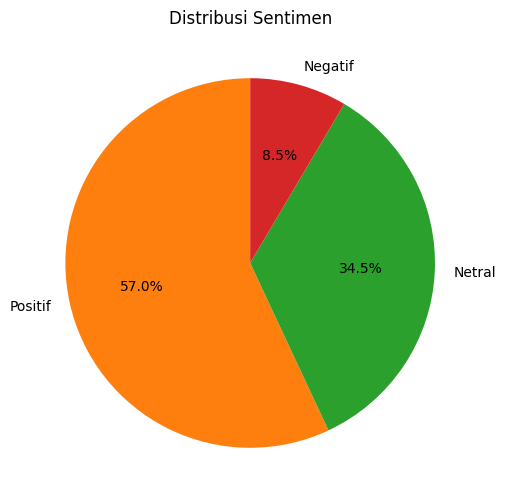

In [ ]:
class_distribution = df_copy['sentimen_vader'].value_counts()
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=['#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Distribusi Sentimen')
plt.ylabel('')
plt.show()

In [ ]:
train_s0 = df_copy[df_copy["sentimen_vader"]=="Negatif"]
train_s0.head()

,full_text,tweet_english,sentimen_vader
3,drop skor utbk lolos akutansi upn veteran yogy...,Drop score Utbk Lolos Akutan Upn Veteran Yogya...,Negatif
13,pagi camaba udh snbt daftar starterpack altern...,morning camaba udh snbt list starterpack alter...,Negatif
38,gak sih tweps,"No, tweps",Negatif
50,ga masuk ugm ga terima inget menfess sial iya ...,not entering ugm not accept remembering menfes...,Negatif
56,banget ngerayain lulus snbp lihat kadang iri g...,banget ngerayain lulus snbp lihat kadang iri g...,Negatif


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<ipython-input-11-fb17d0aeceb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0['full_text'] = train_s0['full_text'].astype(str)


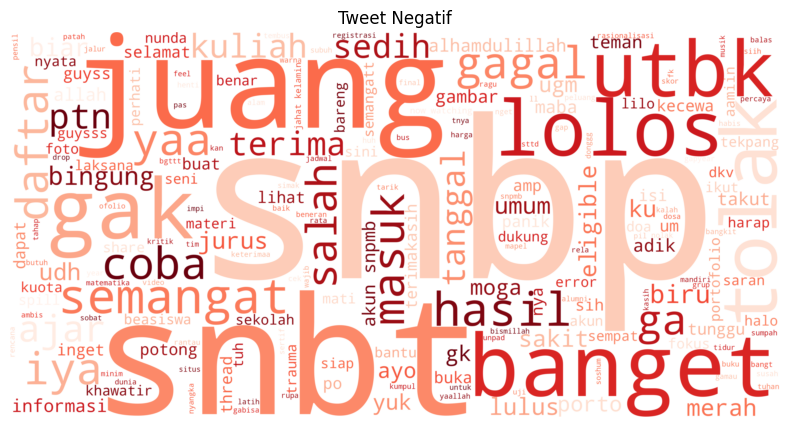

In [ ]:
train_s0['full_text'] = train_s0['full_text'].astype(str)
all_text_s0 = ' '.join(word for word in train_s0['full_text'])
wordcloud = WordCloud(colormap='Reds', background_color='white', width=4000, height=2000, mode="RGBA").generate(all_text_s0)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tweet Negatif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_s1 = df_copy[df_copy["sentimen_vader"]=="Positif"]
train_s1.head()

,full_text,tweet_english,sentimen_vader
1,welcome tpb fsrd itb,welcome tpb fsrd itb,Positif
2,teman bingung bangetttt lulus snbp orang tua k...,"Friends are very confused, I graduated from SN...",Positif
4,teman teman maaf banget bantu kuesioner tugas ...,Friends Sorry Banget Helps Lecture Duties Bart...,Positif
6,webinar nasional gratis tema intelektual muda ...,National Webinar Free Young Intellectual Theme...,Positif
7,late to party portofolio ku tolak dkv isi ygy ...,late to party portfolio I refuse DKV with the ...,Positif


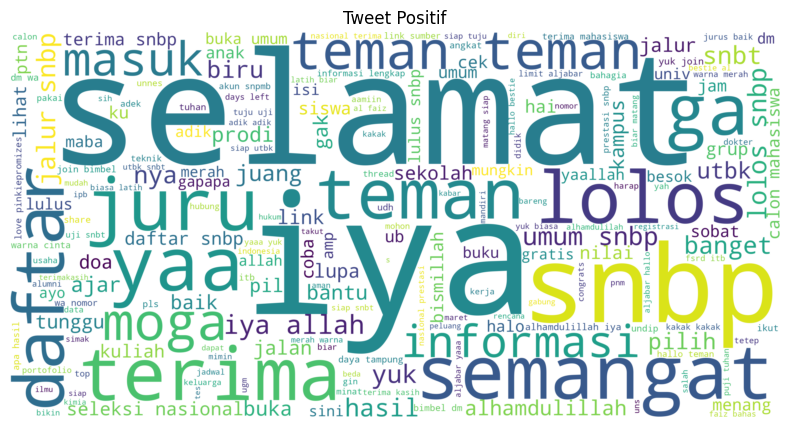

In [ ]:
# Ubah tipe data kolom 'full_text' menjadi string
train_s1.loc[:, 'full_text'] = train_s1['full_text'].astype(str)

# Gabungkan semua teks menjadi satu string besar
all_text_s1 = ' '.join(word for word in train_s1['full_text'])

# Buat WordCloud
wordcloud = WordCloud(colormap='viridis', background_color='white', width=4000, height=2000, mode="RGBA").generate(all_text_s1)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tweet Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_s2 = df_copy[df_copy["sentimen_vader"]=="Netral"]
train_s2.shape

(471, 3)

In [ ]:
train_s2.to_excel("data_label_Netral.xlsx", index = False)

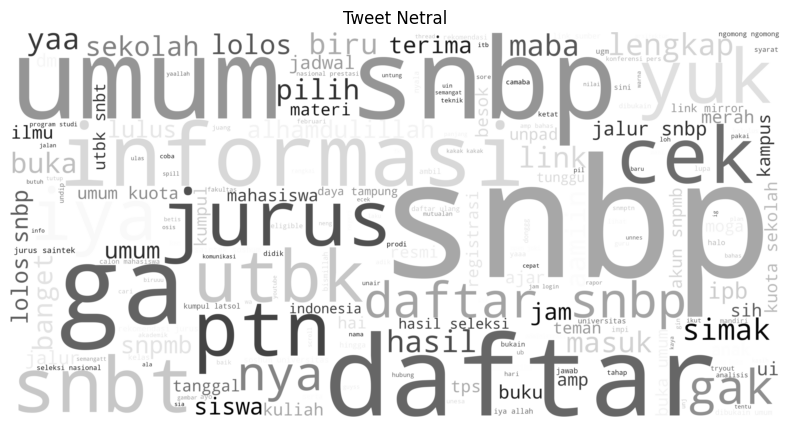

In [ ]:
# Ubah tipe data kolom 'full_text' menjadi string
train_s2.loc[:, 'full_text'] = train_s2['full_text'].astype(str)

# Gabungkan semua teks menjadi satu string besar
all_text_s2 = ' '.join(word for word in train_s2['full_text'])

# Buat WordCloud
wordcloud = WordCloud(colormap='Greys', background_color='white', width=4000, height=2000, mode="RGBA").generate(all_text_s2)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tweet Netral")
plt.margins(x=0, y=0)
plt.show()


In [ ]:
df_train = pd.read_csv('drive/MyDrive/Tugas/data_label_fixx.csv', encoding='unicode_escape', sep=',')

In [ ]:
df_train.drop_duplicates()

,full_text,tweet_english,sentimen_vader
0,simak syarat masuk grup whatsapp,Check out the Whatsapp group entry requirements,Netral
1,welcome tpb fsrd itb,welcome tpb fsrd itb,Positif
2,teman bingung bangetttt lulus snbp orang tua k...,"Friends are very confused, I graduated from SN...",Positif
3,drop skor utbk lolos akutansi upn veteran yogy...,Drop score Utbk Lolos Akutan Upn Veteran Yogya...,Negatif
4,teman teman maaf banget bantu kuesioner tugas ...,Friends Sorry Banget Helps Lecture Duties Bart...,Positif
...,...,...,...
1359,buku siap utbk snbt ugm ui itb sbmptn snbt utb...,The book is ready to go to the book of it as i...,Positif
1360,jual buku wangsit soshum up iya baguss ajar skrg,"selling soshum up wangsit books, yes, good tea...",Positif
1361,teman teman ken ambis ngerjar nilai rapot snbp...,Ken's friends are working on the value of the ...,Positif
1362,bismillah terima unj,Bismillah receive UNJ,Netral


In [ ]:
df_train.to_excel("data_label_.xlsx", index = False)

In [ ]:
df_train.head()

,full_text,tweet_english,sentimen_vader
0,simak syarat masuk grup whatsapp,Check out the Whatsapp group entry requirements,Netral
1,welcome tpb fsrd itb,welcome tpb fsrd itb,Positif
2,teman bingung bangetttt lulus snbp orang tua k...,"Friends are very confused, I graduated from SN...",Positif
3,drop skor utbk lolos akutansi upn veteran yogy...,Drop score Utbk Lolos Akutan Upn Veteran Yogya...,Negatif
4,teman teman maaf banget bantu kuesioner tugas ...,Friends Sorry Banget Helps Lecture Duties Bart...,Positif


In [ ]:
df=df_train

In [ ]:
# Import libarary confusion matrix dan yang lain
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
# Select model Naive bayes & library lain
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
import pandas as pd
import joblib
from sklearn.naive_bayes import BernoulliNB
from imblearn.over_sampling import SMOTE

In [ ]:
# Define the pipeline with SMOTE
pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('nb', BernoulliNB())
])

In [ ]:
# Define the parameter grid
param_grid = {
    'nb__alpha': [1.0],
    'nb__binarize': [0.0, 0.5, 1.0],
    'tfidf__max_df': [0.5, 0.7, 1.0],
    'tfidf__max_features': [500, 1000, 1500],
    'tfidf__min_df': [3, 5, 7],
    'tfidf__ngram_range': [(1,1), (1,2)]
}

In [ ]:
# Initialize Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

In [ ]:
# Split the data
X = df['tweet_english']
y = df['sentimen_vader']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('nb', BernoulliNB())]),
             param_grid={'nb__alpha': [1.0], 'nb__binarize': [0.0, 0.5, 1.0],
                         'tfidf__max_df': [0.5, 0.7, 1.0],
                         'tfidf__max_features': [500, 1000, 1500],
                         'tfidf__min_df': [3, 5, 7],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy')

In [ ]:
# Get the best estimator
best_model = grid_search.best_estimator_

In [ ]:
# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [ ]:
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
conf_matrix = confusion_matrix(y_test, y_pred)

Best Parameters: {'nb__alpha': 0.1, 'nb__binarize': 0.0, 'tfidf__max_df': 0.5, 'tfidf__max_features': 1000, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 1)}
Accuracy: 0.7875457875457875
Precision: 0.771919916817876
Recall: 0.7875457875457875


## Cofusion Mattrixs

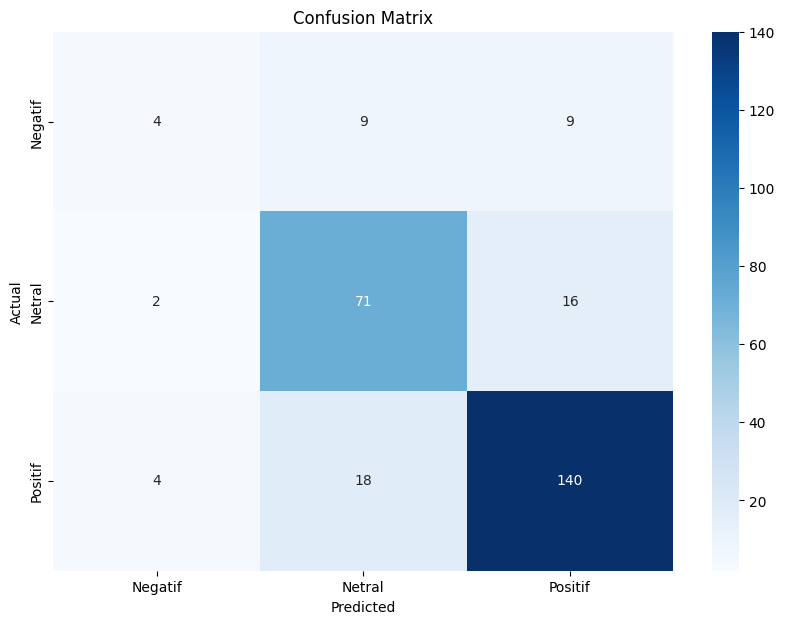

(0.7875457875457875,
 0.771919916817876,
 0.7875457875457875,
 array([[  4,   9,   9],
        [  2,  71,  16],
        [  4,  18, 140]]))

In [ ]:
# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy, precision, recall, conf_matrix

In [ ]:
# Save the trained model
joblib.dump(best_model, 'sentiment1_analysis_pipeline.pkl')

['sentiment1_analysis_pipeline.pkl']

In [ ]:
def predict_sentiment(text, model):
    clean_text = clean_twitter_text(text)
    prediction = model.predict([clean_text])
    return prediction[0]

In [ ]:
# Load the trained model
model_path = 'drive/MyDrive/Tugas/sentiment1_analysis_pipeline.pkl'
loaded_pipeline = joblib.load(model_path)

In [ ]:
new_text = "Tepat setahun lalu aku gak lulus SNBP. Kalau di inget inget pas sedih sama kecewanya, pokonya gamau balik lagi sih ke waktu itu ðŸ˜«  Allhamdulillah Masyaallah sekarang udh tau maksudnya di tolak itu apa ðŸ«¶ðŸ»ðŸ¥¹  semangat semuanya â¤ï¸â¤ï¸ðŸ’—  #snbp2024 #snbp2023 #snbt2024 https://t.co/EwpJYeqQdd"
predicted_sentiment = predict_sentiment(new_text, loaded_pipeline)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: Negatif
